In [50]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [34]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [32]:
depression_counts = df['species'].value_counts()
print(depression_counts)

species
0    50
1    50
2    50
Name: count, dtype: int64


# Plot

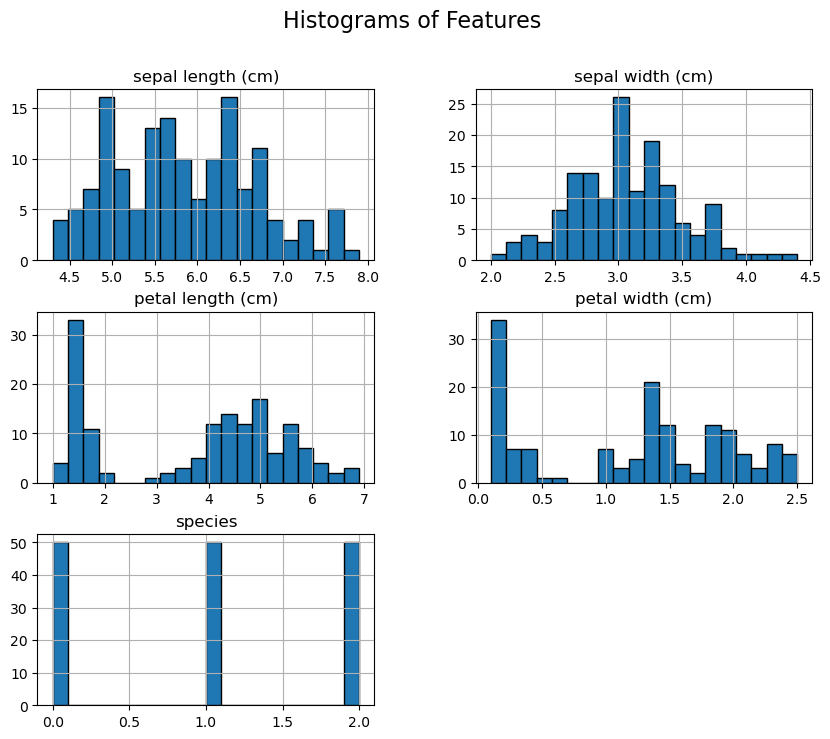

In [38]:
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()

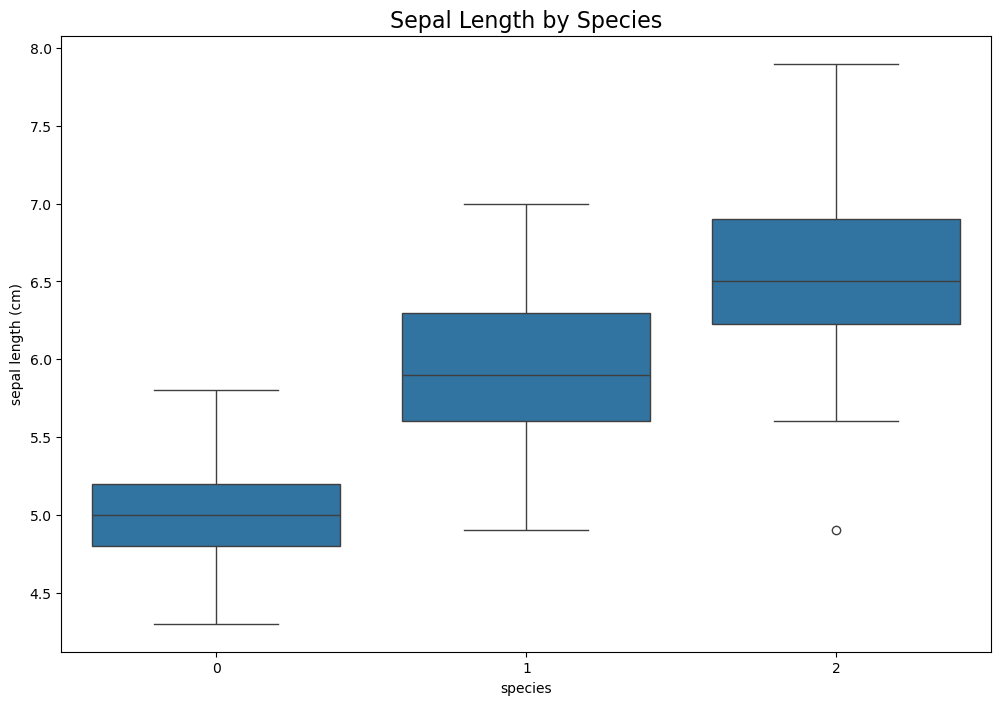

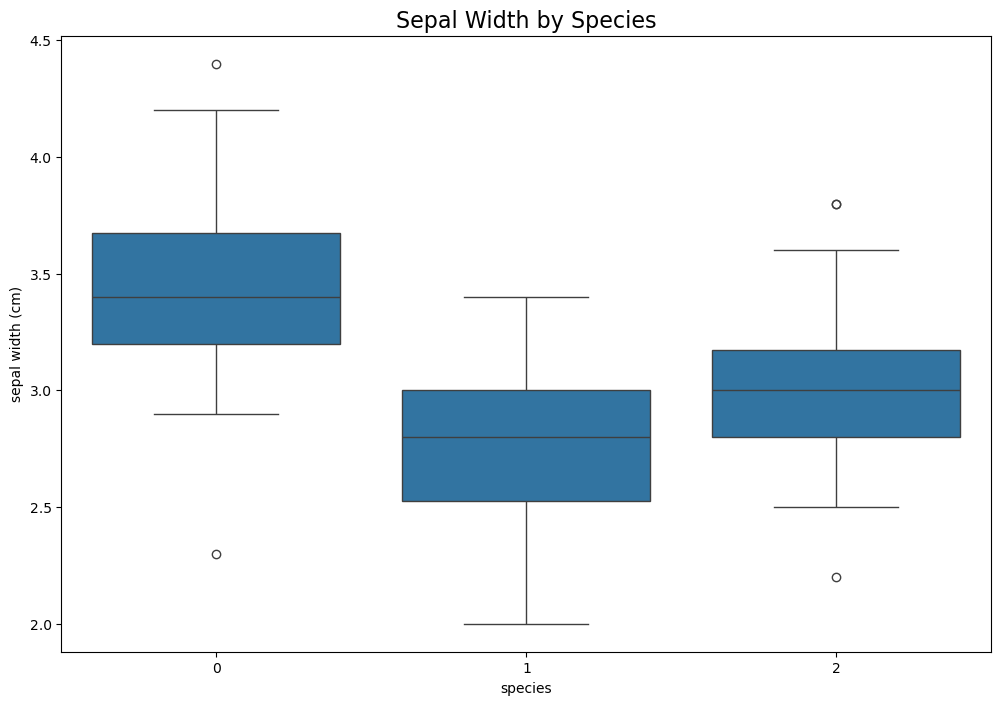

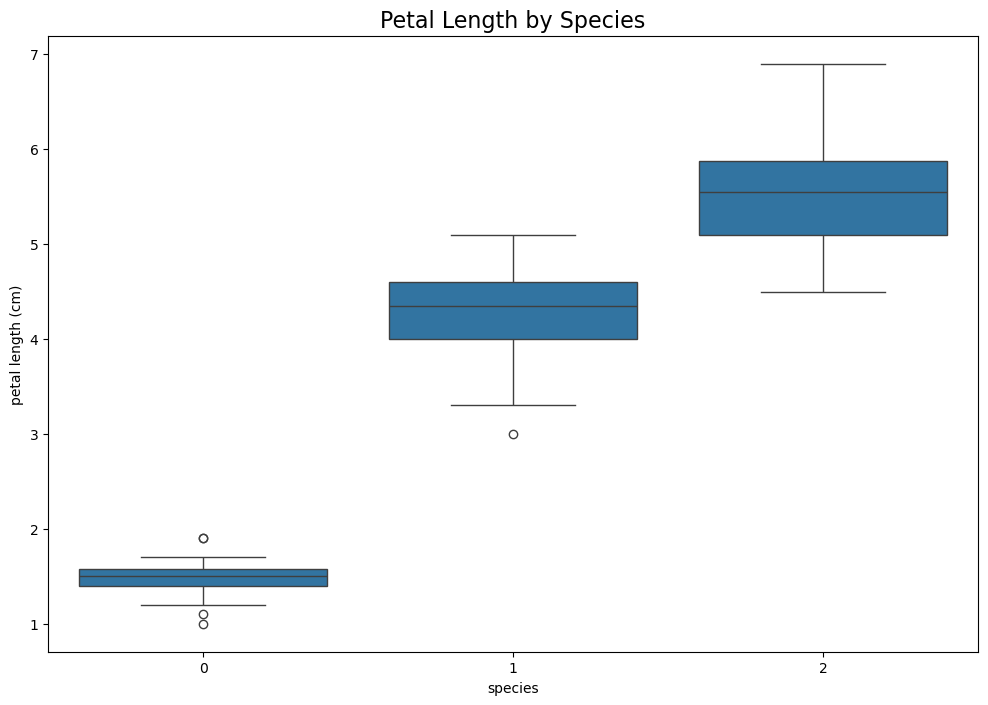

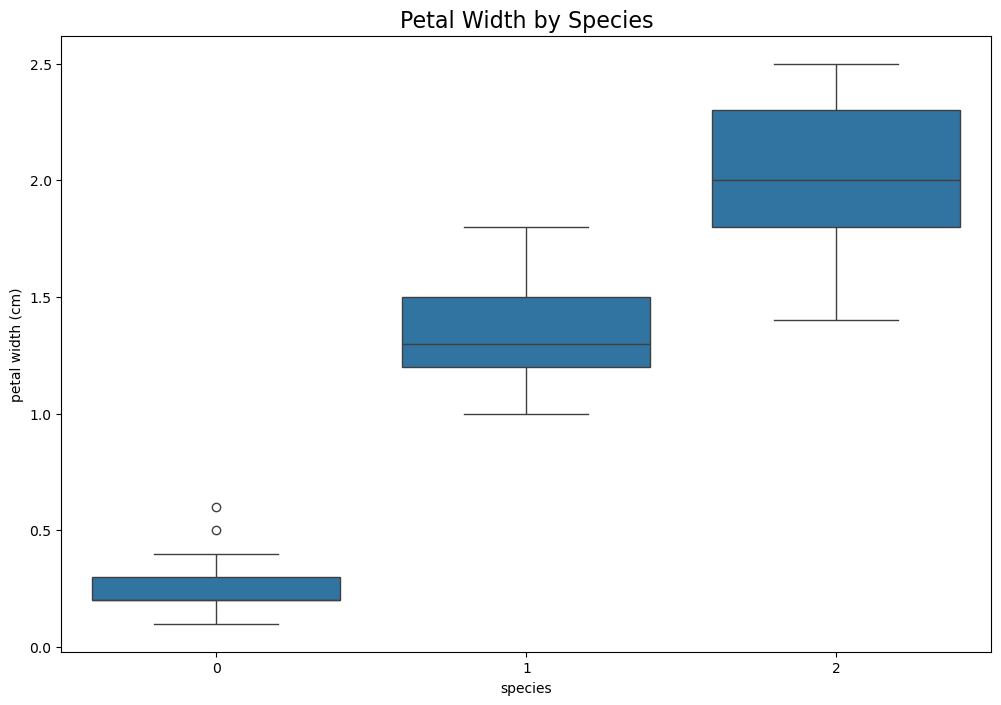

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='species', y='sepal length (cm)')
plt.title("Sepal Length by Species", fontsize=16)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='species', y='sepal width (cm)')
plt.title("Sepal Width by Species", fontsize=16)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='species', y='petal length (cm)')
plt.title("Petal Length by Species", fontsize=16)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='species', y='petal width (cm)')
plt.title("Petal Width by Species", fontsize=16)
plt.show()

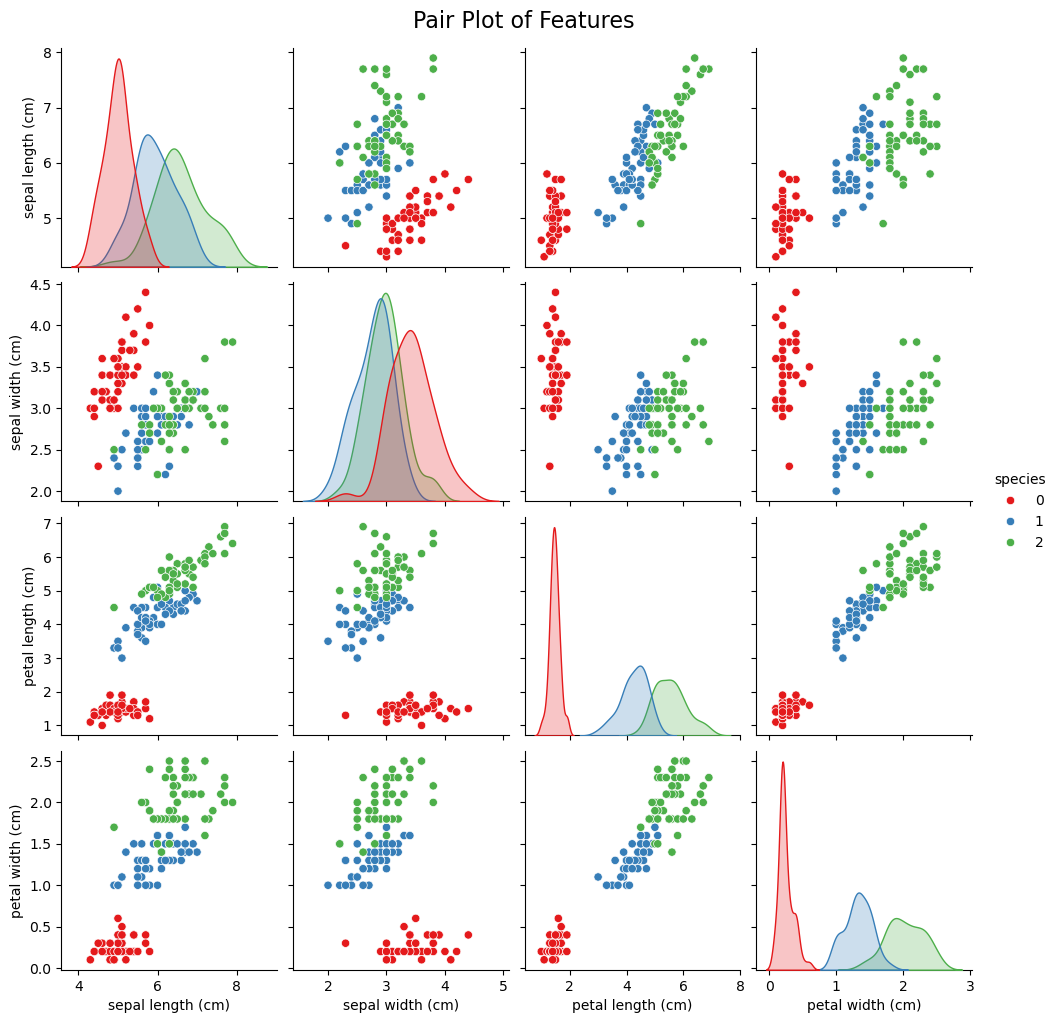

In [41]:
sns.pairplot(df, hue="species", palette="Set1")
plt.suptitle("Pair Plot of Features", y=1.02, fontsize=16)
plt.show()

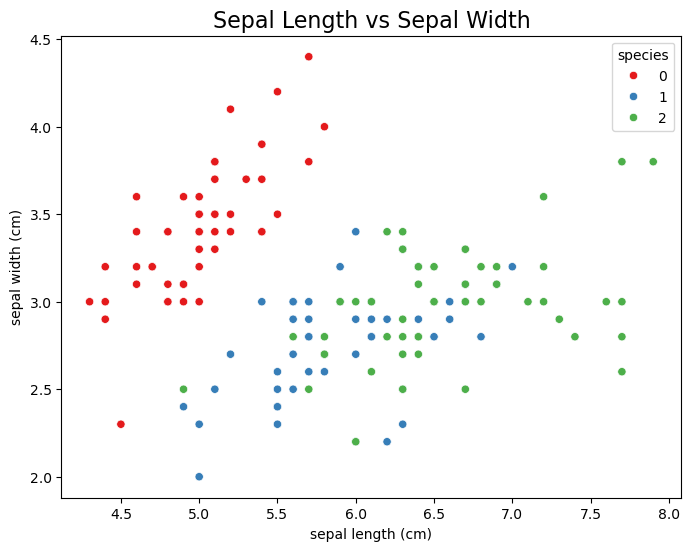

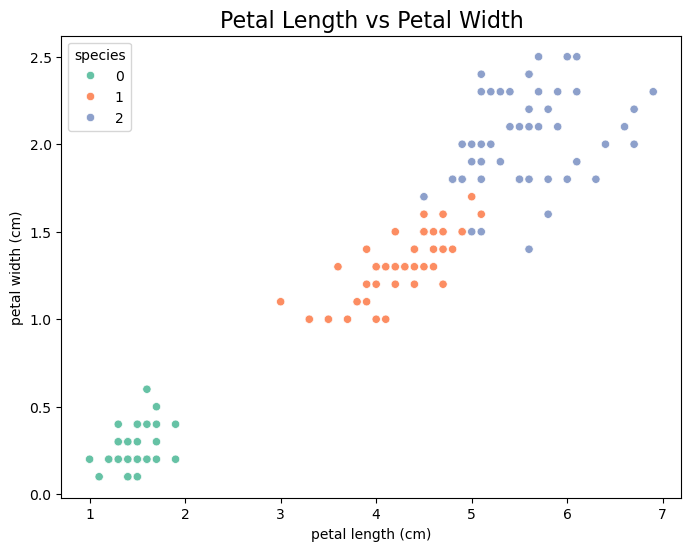

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='Set1')
plt.title("Sepal Length vs Sepal Width", fontsize=16)
plt.show()

# Scatter plot: Petal Length vs Petal Width
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='Set2')
plt.title("Petal Length vs Petal Width", fontsize=16)
plt.show()

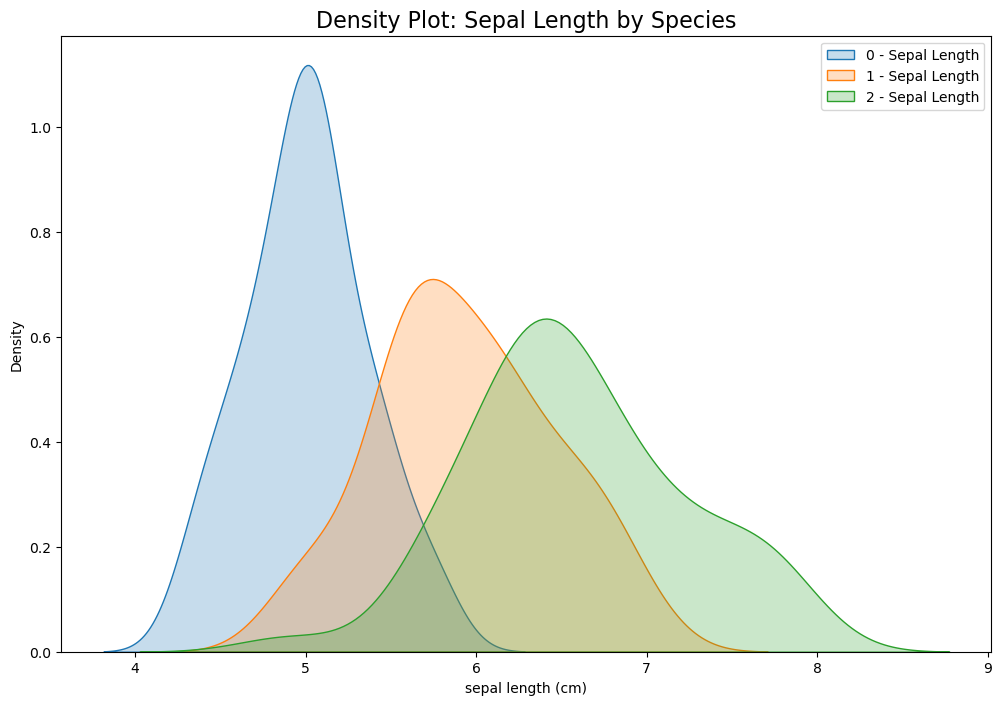

In [42]:
plt.figure(figsize=(12, 8))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    sns.kdeplot(subset['sepal length (cm)'], label=f"{species} - Sepal Length", fill=True)
plt.title("Density Plot: Sepal Length by Species", fontsize=16)
plt.legend()
plt.show()

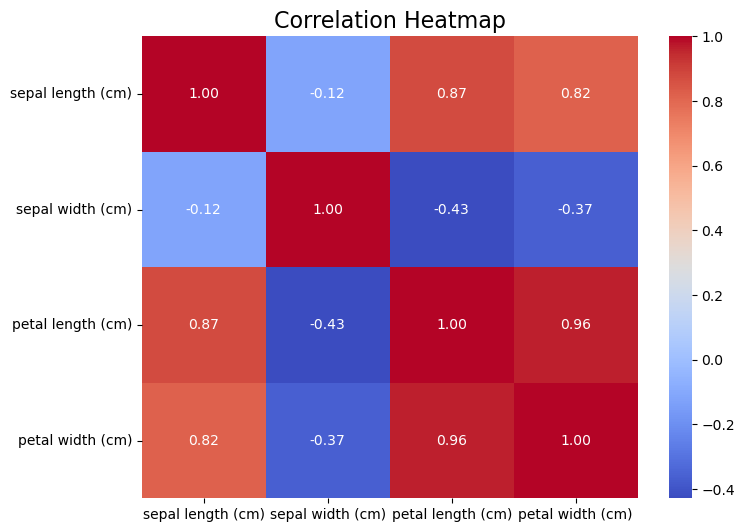

In [44]:
correlation_matrix = df.drop(columns=['species']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Train model

In [47]:
scaler = StandardScaler()
feature_columns = iris.feature_names
df[feature_columns] = scaler.fit_transform(df[feature_columns])

X = df[feature_columns]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and testing datasets prepared:")
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training and testing datasets prepared:
Training samples: 120, Testing samples: 30


In [49]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("\nRandom Forest model trained successfully.")


Random Forest model trained successfully.


In [51]:
# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the model: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [52]:
importances = rf_model.feature_importances_
for feature, importance in zip(feature_columns, importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: sepal length (cm), Importance: 0.1081
Feature: sepal width (cm), Importance: 0.0304
Feature: petal length (cm), Importance: 0.4400
Feature: petal width (cm), Importance: 0.4215
